In [1]:
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
movies = pd.read_csv(
    "https://data-bootcamp-ztc.s3.amazonaws.com/movies_complete_cleaned.csv"
)

awards = pd.read_csv(
    "https://data-bootcamp-ztc.s3.amazonaws.com/parsed_awards_table.csv"
)

movies_sel = movies[["name", "plot"]]

awards_sel = awards[["name", "oscar wins and nominations"]]

df = pd.merge(movies_sel, awards_sel, how="right", on="name")

df["oscar_nom"] = [1 if x != 0 else 0 for x in df["oscar wins and nominations"]]

df = df[["name", "plot", "oscar_nom"]]

df.dropna(inplace=True)

df.head()

,name,plot,oscar_nom
0,Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",1
1,Sleight,A young street magician (Jacob Latimore) is le...,0
2,Silence,The story of two Catholic missionaries (Andrew...,1
3,Manchester by the Sea,"Lee Chandler is a brooding, irritable loner wh...",1
4,Dirty Grandpa,"Jason Kelly, the grandson of Dick Kelly, loses...",0


<IPython.core.display.Javascript object>

### EDA

Handling missing values straight from the start.

Plotting the distribution of the target variable.

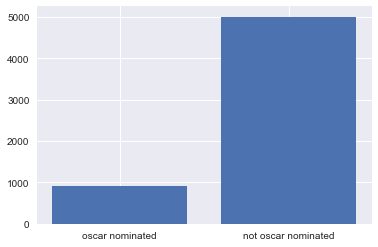

<IPython.core.display.Javascript object>

In [3]:
oscar = df[df.oscar_nom == 1].shape[0]
non_oscar = df[df.oscar_nom == 0].shape[0]
plt.bar(["oscar nominated", "not oscar nominated"], [oscar, non_oscar])
plt.savefig("../../image_highlights/oscar_nomination_model/imbalanced_data.png")

In [4]:
def plot_target_based_features(feature):
    x1 = df[df["oscar_nom"] == 1][feature]
    x2 = df[df["oscar_nom"] == 0][feature]
    plt.figure(1, figsize=(16, 8))
    plt.subplot(1, 1, 1)
    _ = plt.hist(x2, alpha=0.5, color="grey", bins=50)
    _ = plt.hist(x1, alpha=0.7, color="red", bins=50)

    return _

<IPython.core.display.Javascript object>

Check the number of characters in the text feature.

In [5]:
df["text_len"] = [len(x) if type(x) == str else 0 for x in df["plot"]]


df

,name,plot,oscar_nom,text_len
0,Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",1,464
1,Sleight,A young street magician (Jacob Latimore) is le...,0,289
2,Silence,The story of two Catholic missionaries (Andrew...,1,254
3,Manchester by the Sea,"Lee Chandler is a brooding, irritable loner wh...",1,420
4,Dirty Grandpa,"Jason Kelly, the grandson of Dick Kelly, loses...",0,344
...,...,...,...,...
6251,Hoosiers,Based on the true story of a small-town Indian...,1,236
6252,Off Beat,Traumatised paramedic looks for the woman of h...,0,56
6253,Big Trouble in Little China,"Truck driver Jack Burton arrives in Chinatown,...",0,805
6254,Biggles: Adventures in Time,One minute the New Yorker advertising expert J...,0,507


<IPython.core.display.Javascript object>

In [6]:
len(df.loc[0, "plot"])

464

<IPython.core.display.Javascript object>

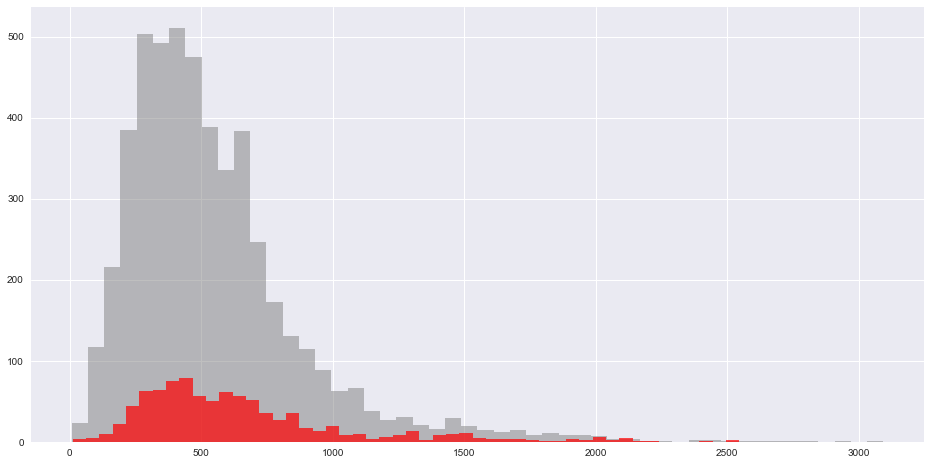

<IPython.core.display.Javascript object>

In [7]:
_ = plot_target_based_features("text_len")


Check the number number of words in the text feature.

In [8]:
df["words_count"] = [len(x.split()) if type(x) == str else 0 for x in df["plot"]]

<IPython.core.display.Javascript object>

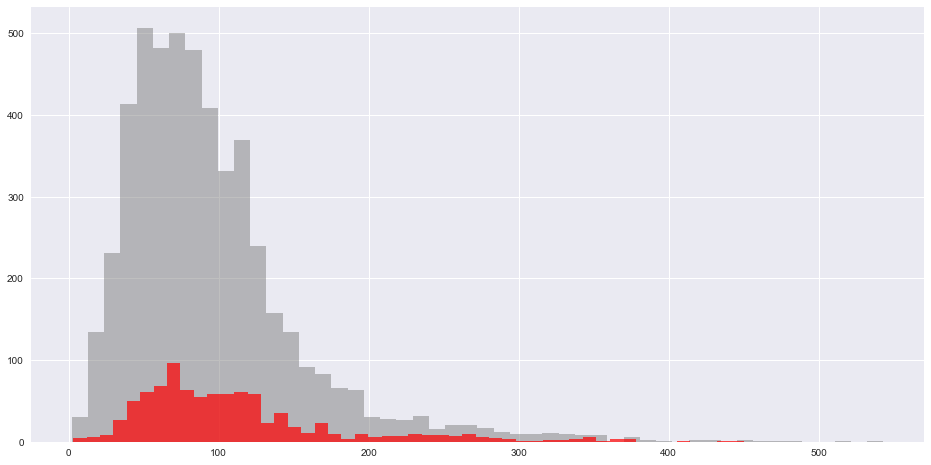

<IPython.core.display.Javascript object>

In [9]:
_ = plot_target_based_features("words_count")

Count the number of unique words

In [10]:
df["unique_word_count"] = [
    len(set(str(x).split())) if type(x) == str else 0 for x in df["plot"]
]

<IPython.core.display.Javascript object>

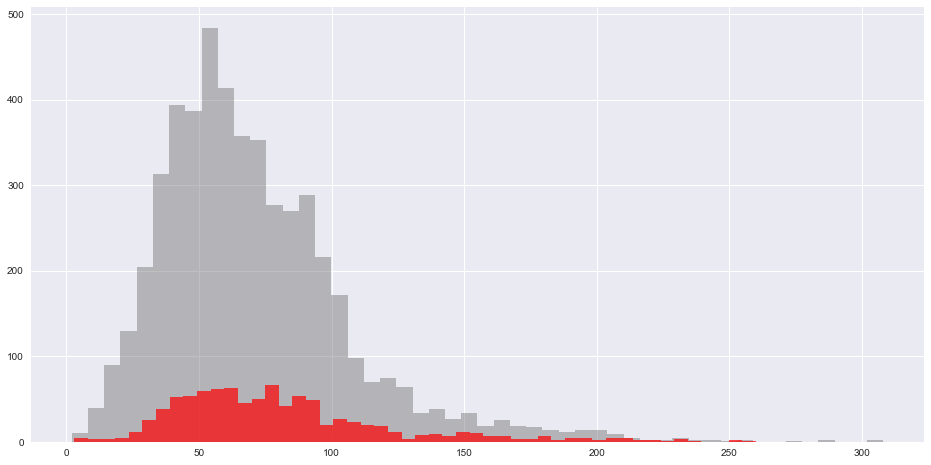

<IPython.core.display.Javascript object>

In [11]:
_ = plot_target_based_features("unique_word_count")

Mean word length

In [12]:
df["mean_word_length"] = [
    np.mean([len(w) for w in str(x).split()]) if type(x) == str else 0
    for x in df["plot"]
]

<IPython.core.display.Javascript object>

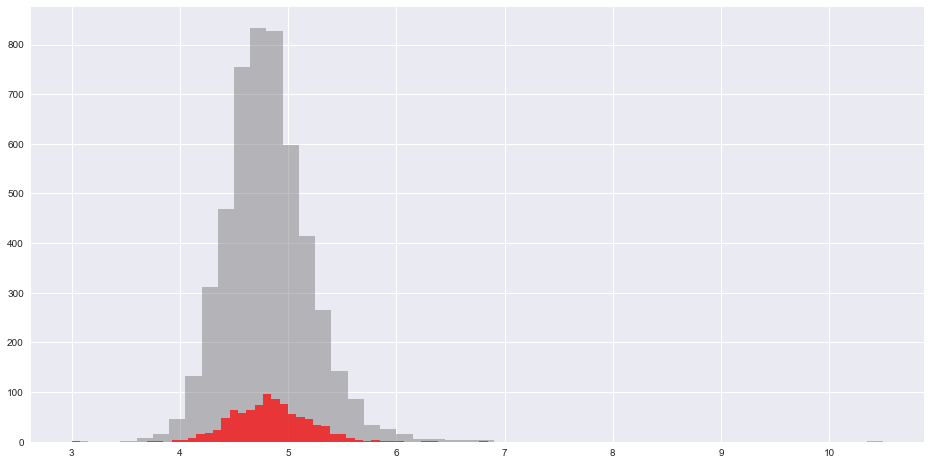

<IPython.core.display.Javascript object>

In [13]:
_ = plot_target_based_features("mean_word_length")

Punctuation count

In [14]:
import string

train["punctuation_count"] = train["text"].map(
    lambda x: len([c for c in str(x) if c in string.punctuation])
)

NameError: name 'train' is not defined

<IPython.core.display.Javascript object>

In [ ]:
_ = plot_target_based_features("punctuation_count")

Looking at the plots above we can see that the new generated features have different distributions for the two target categories.

Therefore these features might be useful in models that we can try.